In [44]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [86]:
def display(img):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    ax.imshow(img)

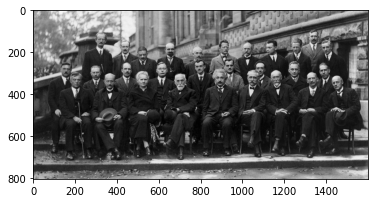

In [46]:
nadia = cv2.imread('../DATA/Nadia_Murad.jpg', 0) # Second parameter zero, laods an image in gray scale mode
denis = cv2.imread('../DATA/Denis_Mukwege.jpg', 0)
solvay = cv2.imread('../DATA/solvay_conference.jpg', 0)

plt.imshow(solvay, cmap='gray')

In [47]:
face_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_frontalface_default.xml')

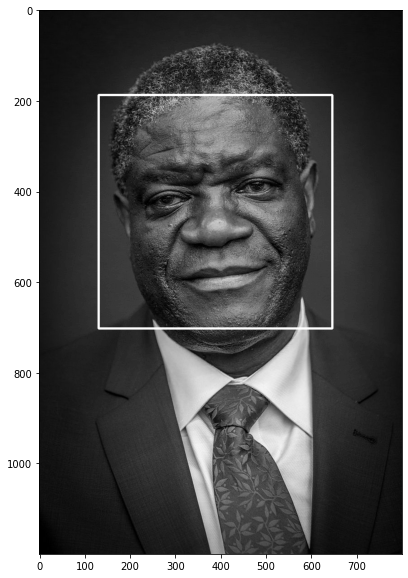

In [48]:
def detect_face(img):
    
    face_img = img.copy()
    face_rects = face_cascade.detectMultiScale(face_img) # Returns x,y,w,h positions 
    
    for x,y,w,h in face_rects:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 255, 255), 4)
        
    return face_img
    
    
img = detect_face(denis)
display(img, cmap='gray')

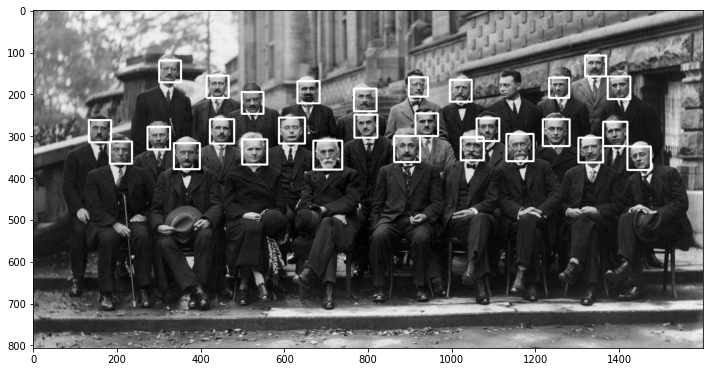

In [62]:
def adj_detect_face(img):
    
    face_img = img.copy()
    face_coords = face_cascade.detectMultiScale(face_img, scaleFactor=1.2, minNeighbors=5)
    
    for (x,y,w,h) in face_coords:
        cv2.rectangle(face_img, (x,y), (x+w, y+h), (255, 0, 255), 4)
        
    return face_img

adj_img = adj_detect_face(solvay)
display(adj_img)

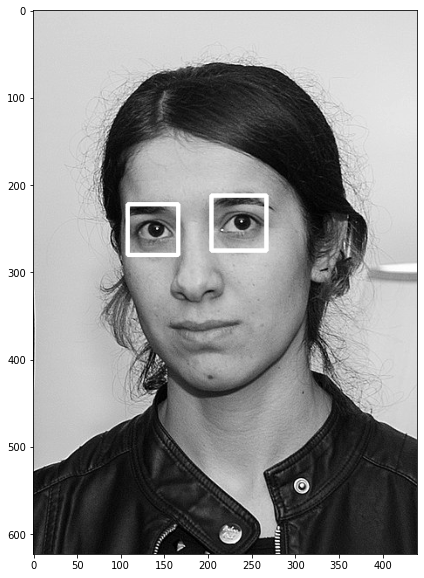

In [80]:
eye_cascade = cv2.CascadeClassifier('../DATA/haarcascades/haarcascade_eye.xml')


def detect_eyes(img):
    
    eyes_img = img.copy()
    eyes_coords = eye_cascade.detectMultiScale(eyes_img, scaleFactor=1.2, minNeighbors=6)
    
    for (x,y,w,h) in eyes_coords:
        cv2.rectangle(eyes_img, (x,y), (x+w, y+h), (255, 255, 0), 4)
        
    return eyes_img

display(detect_eyes(nadia))

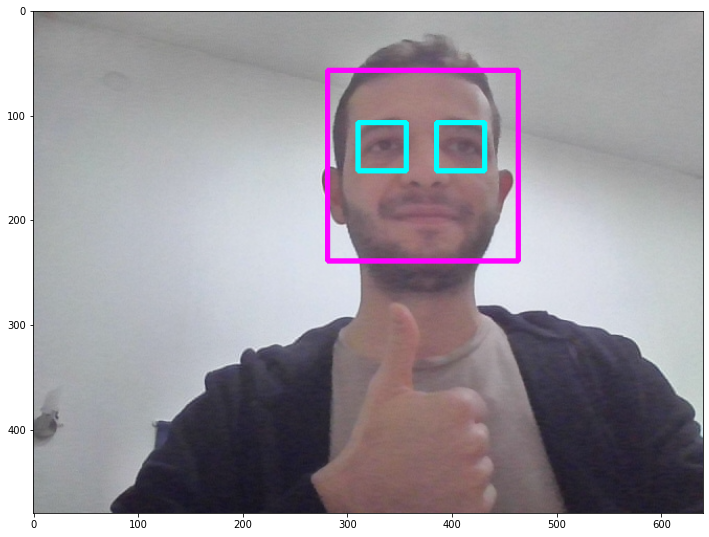

In [87]:
cap = cv2.VideoCapture(0)

while True:
    
    ret, frame = cap.read()
    new_frame = adj_detect_face(frame)
    new_frame2 = detect_eyes(new_frame)
    
    cv2.imshow('Face Finder',new_frame2)
    
    if cv2.waitKey(1) & 0xFF == 27:
        break

cap.release()
cv2.destroyAllWindows()

display(new_frame2)